# Die Class

In [1]:
import pandas as pd
import numpy as np

In [150]:
class Die:
    

    def __init__(self, faces_array):
        self.faces_array = faces_array
        if not isinstance(self.faces_array[0], (int, str)):
            raise TypeError("Only integers or string are allowed")
        else:
            self.weights = np.ones(len(faces_array))
            self.weight_face = pd.DataFrame({'face' : faces_array, 'weights' : self.weights})
            self.weight_face.index +=1
    def change_weight(self, face_value, new_weight):
        self.face_value = face_value
        self.new_weight = new_weight
        if self.face_value not in self.faces_array:
            raise ValueError("Only values in faces array can have their weights changed")
        else:
            self.weights[face_value] = new_weight
            self.weight_face['weights'] = self.weights
    def roll_die(self, num_roll = 1):
        if not isinstance(num_roll, int):
            raise TypeError("Only integers are allowed")
        else:
            df = self.weight_face.sample(num_roll, replace =True, weights = 'weights')
            return df['face'].tolist()
    def current_die(self):
        return self.weight_face
    
    

In [211]:

b = Die([1,2,3,4,5,6])
b.change_weight(4, 200)
b.roll_die(5)

[5, 5, 5, 5, 5]

In [116]:
len(d.roll_die(4))

4

In [113]:
d.current_die().to_dict()

{'face': {1: 1, 2: 2, 3: 3}, 'weights': {1: 1.0, 2: 1.0, 3: 200.0}}

In [114]:
make_dict = {'face' : {1:1, 2:2, 3:3}, 'weights' :{1: 1.0, 2:1.0, 3: 200.0}}
make_dict

{'face': {1: 1, 2: 2, 3: 3}, 'weights': {1: 1.0, 2: 1.0, 3: 200.0}}

# Game Class

In [208]:
import pandas as pd
import numpy as np
class Game:
    def __init__(self, die_list):
        self.die_list = die_list
        if not isinstance(self.die_list[0], (Die)):
            raise TypeError("Only die objects are allowed")
        else:
            self.die_list = die_list                       
                          
    def play(self, num_rolls):
        ''' rolls each die in die_list num_rolls times
        n rolls by m dice '''
        self.num_rolls = num_rolls
        self.dice_rolls = [i.roll_die(self.num_rolls) for i in self.die_list]
        self.__play_df = pd.DataFrame(self.dice_rolls)
        self.__play_df.index +=1
        self.__play_df.columns +=1
        return None
    def show_play(self, wide = True):
        self.wide = wide
        if self.wide == False:
            return self.__play_df.T.stack().to_frame()   
        else:
            return self.__play_df
        

In [209]:
dice = Game([7, b, c])
dice.play(9)
ser = pd.Series(dice.die_list)
ser.dtypes

TypeError: Only die objects are allowed

# Analyzer Class

In [140]:
class Analyzer:
    combo = pd.DataFrame([])
    def __init__(self, game_object):
        self.game_object = game_object

    def jackpot(self):
        df = self.game_object.show_play().T
        a = df.values
        b = (a == a[:, [0]]).all(axis=1)
        count = np.count_nonzero(b)
        return count
    def combo(self):
        self._result = self.game_object.show_play().T
        self.combo = self._result.apply(lambda x: pd.Series(sorted(x)), 1).value_counts().to_frame('n')
        return self.combo
    
    def face_counts(self):
        self._result = self.game_object.show_play().T
        self.face_counts = self._result.apply(pd.Series.value_counts, axis=1).fillna(0)
        return self.face_counts.astype(int)
                    

In [141]:
analysis = Analyzer(dice)
analysis.jackpot()

0

# Scenario 1

In [11]:
fair = Die([1,2])
unfair = Die([1,2])
unfair.change_weight(1, 5)

In [12]:
fair_coins = Game([fair, fair, fair])
unfair_coins = Game([unfair, unfair, fair])

fair_coins.play(1000)
unfair_coins.play(1000)

analyze_fair = Analyzer(fair_coins)
analyze_unfair = Analyzer(unfair_coins)

In [13]:
jack_fair = analyze_fair.jackpot() / 1000
jack_unfair = analyze_unfair.jackpot() / 1000
freq_df = pd.DataFrame({'jackpot frequencies': ['fair frequency','unfair frequency'],'val': [jack_fair, jack_unfair]})


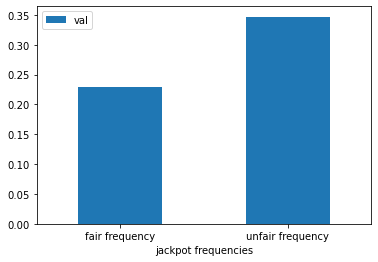

In [14]:
ax = freq_df.plot.bar(x = 'jackpot frequencies', y = 'val', rot = 0)

# Scenario 2

In [15]:
fair_die = Die([1,2,3,4,5,6])
unfair_die_1 = Die([1,2,3,4,5,6])
unfair_die_2 = Die([1,2,3,4,5,6])
unfair_die_1.change_weight(5, 5)
unfair_die_2.change_weight(0, 5)

In [16]:
fair_game = Game([fair_die, fair_die, fair_die, fair_die, fair_die])
unfair_game = Game([unfair_die_1, unfair_die_1, unfair_die_2, fair_die, fair_die])

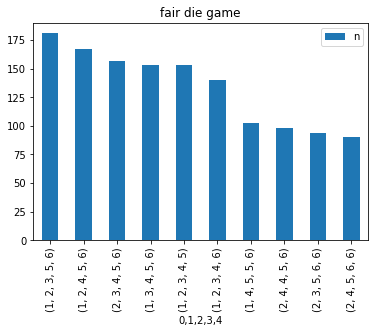

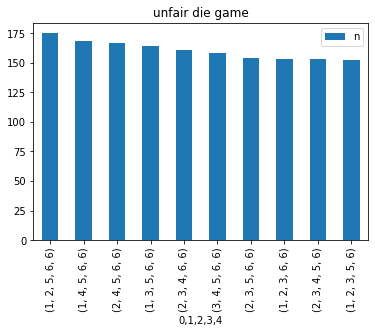

In [17]:
fair_game.play(10000)
unfair_game.play(10000)
analyze_fair_die = Analyzer(fair_game)
analyze_unfair_die = Analyzer(unfair_game)

jack_fair_die = analyze_fair_die.jackpot() / 1000
jack_unfair_die = analyze_unfair_die.jackpot() / 1000
freq_die_df = pd.DataFrame({'jackpot frequencies': ['fair frequency','unfair frequency'],'val': [jack_fair_die, jack_unfair_die]})

fair1 = analyze_fair_die.combo().head(10)
unfair1 =analyze_unfair_die.combo().head(10)

plot1 = fair1.plot.bar(y = 'n', use_index = True, title = 'fair die game')
plot2 = unfair1.plot.bar(y = 'n', use_index = True, title = 'unfair die game')

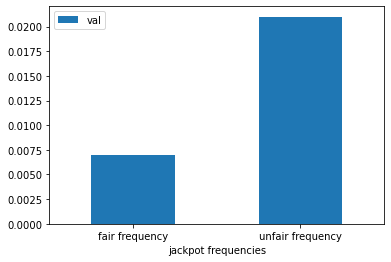

In [18]:
ax2 = freq_die_df.plot.bar(x = 'jackpot frequencies', y = 'val', rot = 0)

# Scenario 3

In [94]:
alphabet = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z')
alpha_weights = [8.4966,2.0720,4.5388,3.3844,11.1607
,1.8121,2.4705,3.0034,7.5448,0.1965,1.1016,5.4893
,3.0129,6.6544,7.1635,3.1671,0.1962,7.5809,5.7351,6.9509
,3.6308,1.0074,1.2899,0.2902,1.7779,0.2722]
alpha1 = Die(alphabet)
alpha1.weight_face['weights'] = alpha_weights
alpha2 = Die(alphabet)
alpha2.weight_face['weights'] = alpha_weights
alpha3= Die(alphabet)
alpha3.weight_face['weights'] = alpha_weights
alpha4 = Die(alphabet)
alpha4.weight_face['weights'] = alpha_weights
alpha5 = Die(alphabet)
alpha5.weight_face['weights'] = alpha_weights



In [97]:
dice = Game([alpha1, alpha2, alpha3, alpha4, alpha5])
dice.play(1000)
dice.show_play()

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
1,U,Z,L,A,P,P,A,O,N,A,...,P,R,R,E,D,T,E,U,D,T
2,T,P,I,C,E,P,J,N,C,A,...,O,C,I,T,D,E,E,N,T,I
3,V,R,P,C,I,R,T,C,T,S,...,G,R,Z,O,L,I,M,I,I,O
4,T,R,I,D,P,S,N,Z,P,A,...,A,U,H,N,A,T,E,U,N,T
5,V,M,R,T,S,E,O,E,P,E,...,B,T,H,U,I,N,E,E,E,L


I found about 2-3 words every 300 attempts. So roughly 10/1000 or 1%